In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors

In [20]:
# Load data for an exemple file
filename = "Ent_CamK2_09_S10"
Mean_EEG_by_intensity = np.load('Mice_data/'+filename+'_Mean_EEG_by_intensity.npy',allow_pickle=True)
SD_EEG_by_intensity = np.load('Mice_data/'+filename+'_SD_EEG_by_intensity.npy', allow_pickle=True)
all_diff_intensity = np.load('Mice_data/'+filename+'_intensities.npy')

In [25]:
# Parameters
time_window = 250 #ms
Sampling_freq = 2000 #Hz
time_window_datapoints = int(time_window * Sampling_freq / 1000)

Text(0, 0.5, '[uV]')

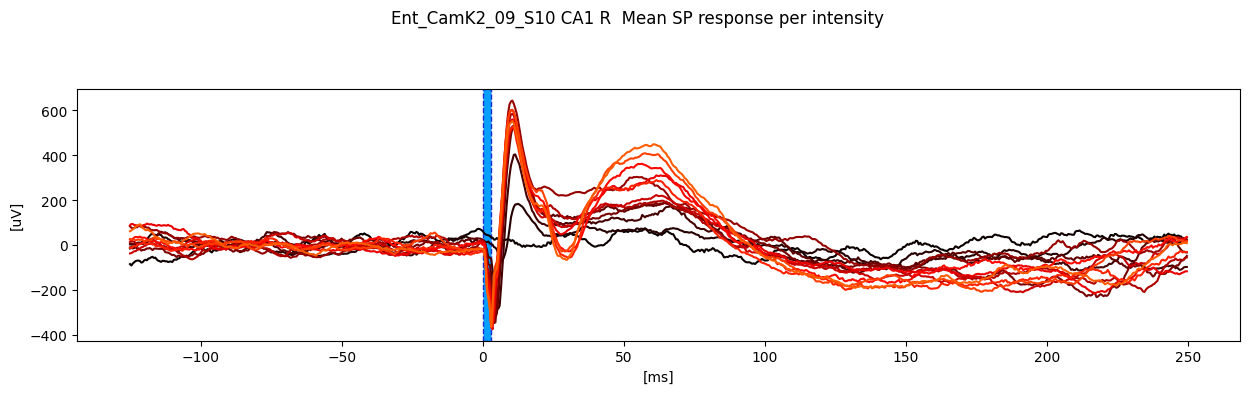

In [26]:
title = filename + " CA1 R " + " Mean SP response per intensity "
fig1 = plt.figure(title, figsize=(15, 8)).suptitle(title)
divnorm = colors.TwoSlopeNorm(vmin=0.4,vcenter=1.0,vmax=1.6)
color_code = plt.cm.hot(divnorm(all_diff_intensity))
gridspec.GridSpec(12, 12)
ax1= plt.subplot2grid((12, 12), (0, 0), rowspan=5, colspan=12)
x = np.arange(-time_window/2, time_window, 1000 / Sampling_freq)
for i in range(len(all_diff_intensity)):
    ax1.plot(x,Mean_EEG_by_intensity[i], color=color_code[i], label=str(all_diff_intensity[i])+' [V]')
ax1.axvspan(0, 3, edgecolor='#1B2ACC', facecolor='#089FFF', linestyle="--", lw=1)
ax1.set_xlabel('[ms]')
ax1.set_ylabel('[uV]')

[]

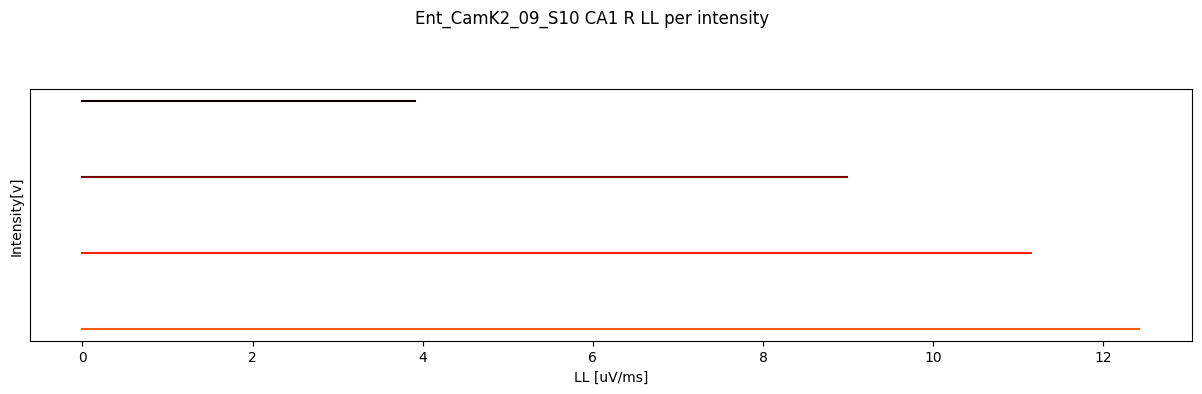

In [32]:
title = filename + " CA1 R" + " LL per intensity"
fig2 = plt.figure(title, figsize=(15, 8)).suptitle(title)
divnorm = colors.TwoSlopeNorm(vmin=0.4, vcenter=1.0, vmax=1.6)
color_code = plt.cm.hot(divnorm(all_diff_intensity))
ax1 = plt.subplot2grid((12, 12), (0, 0), rowspan=5, colspan=12)
gridspec.GridSpec(12, 12)
intensity_to_plot = [0,4,10,12]
for idx,i in enumerate(intensity_to_plot):
    Mean_EEG = Mean_EEG_by_intensity[i]
    Sum_LL = np.sum(np.abs(np.diff(Mean_EEG[int(time_window_datapoints/2):int(time_window_datapoints)])))/time_window
    ax1.plot([0, Sum_LL], [-idx, -idx], color=color_code[i], label=str(all_diff_intensity[i]) + ' [V]')
ax1.set_xlabel("LL [uV/ms]")
ax1.set_ylabel("Intensity[v]")
ax1.set_yticks([])